# Data insights report

In [19]:
import pandas as pd
df = pd.read_csv("cleaned_df.csv")

<br>

## Churn Rate Analysis

Definition of Churn Rate: 
- The rate at which customers stop using the particular phone. 

Formula: 
$$
\text{Churn Rate} = \frac{\text{Churn}}{\text{Closing Subs Monthly}}
$$

Rationale for analysing Churn Rate:
Churn Rate is a critical measure for assessing customer retention. By visualizing trends, we can identify which phone make, phone series etc face higher churn and how these patterns evolve over the years.


## Plot 1: Average Churn Rate by Phone Make Over Time

On average, we see that the churn rate of all 3 phone brands increases over time. 

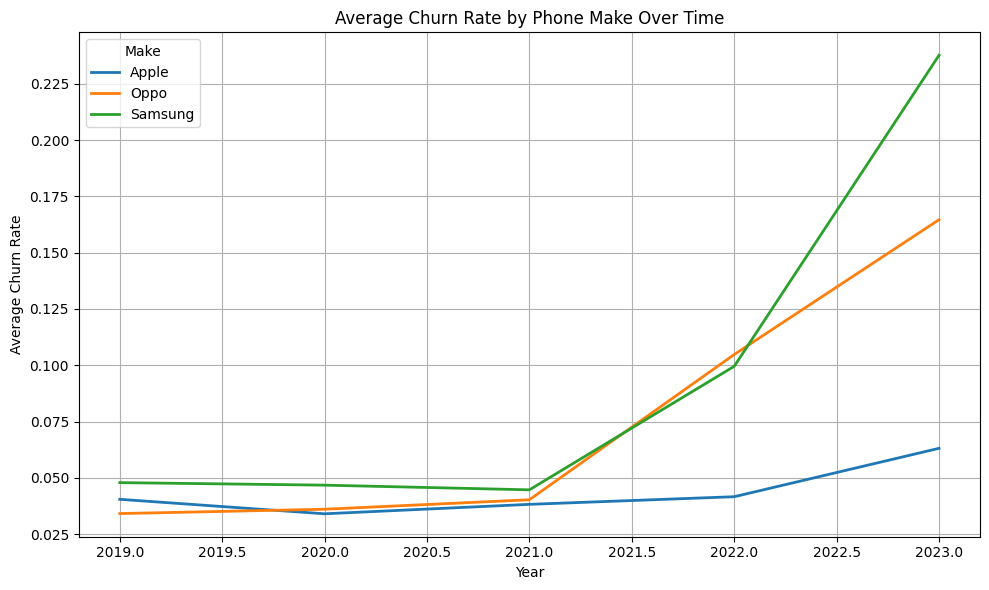

In [20]:
import matplotlib.pyplot as plt

# Convert 'year_month' to datetime and extract 'year'
df['year_month'] = pd.to_datetime(df['year_month'])
df['year'] = df['year_month'].dt.year

# Group by 'year' and 'make', and calculate the average churn rate
agg_df = df.groupby(['year', 'make'], as_index=False)['churn_rate'].mean()

# Initialize the plot
plt.figure(figsize=(10, 6))

# Group by 'make' and plot each group's average churn rate
for make, group in agg_df.groupby('make'):
    plt.plot(group['year'], group['churn_rate'], label=make, linewidth=2)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Churn Rate')
plt.title('Average Churn Rate by Phone Make Over Time')
plt.legend(title='Make')

# Improve aesthetics
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Plot 2: Average Churn Rate by Phone Series Over Time (Separated by Make)

Top 3 phone series with the highest churn rate across 2019 to 2023 belongs to Samsung.

In [21]:
# Group by phone_series and calculate the mean churn_rate for each series
churn_by_series = df.groupby('phone_series')['churn_rate'].mean().reset_index()

# Sort by churn_rate
churn_by_series = churn_by_series.sort_values(by='churn_rate', ascending=False)
churn_by_series


,phone_series,churn_rate
21,SAMSUNG GALAXY J4 PLUS 2018,0.592314
20,SAMSUNG GALAXY A10S,0.388338
19,SAMSUNG GALAXY A10,0.346463
17,OPPO A500,0.187854
15,OPPO A3,0.119593
10,IPHONE 7,0.084674
16,OPPO A5,0.082856
22,SAMSUNG GALAXY NOTE 9,0.081280
11,IPHONE X,0.080611
13,IPHONE XS,0.070242


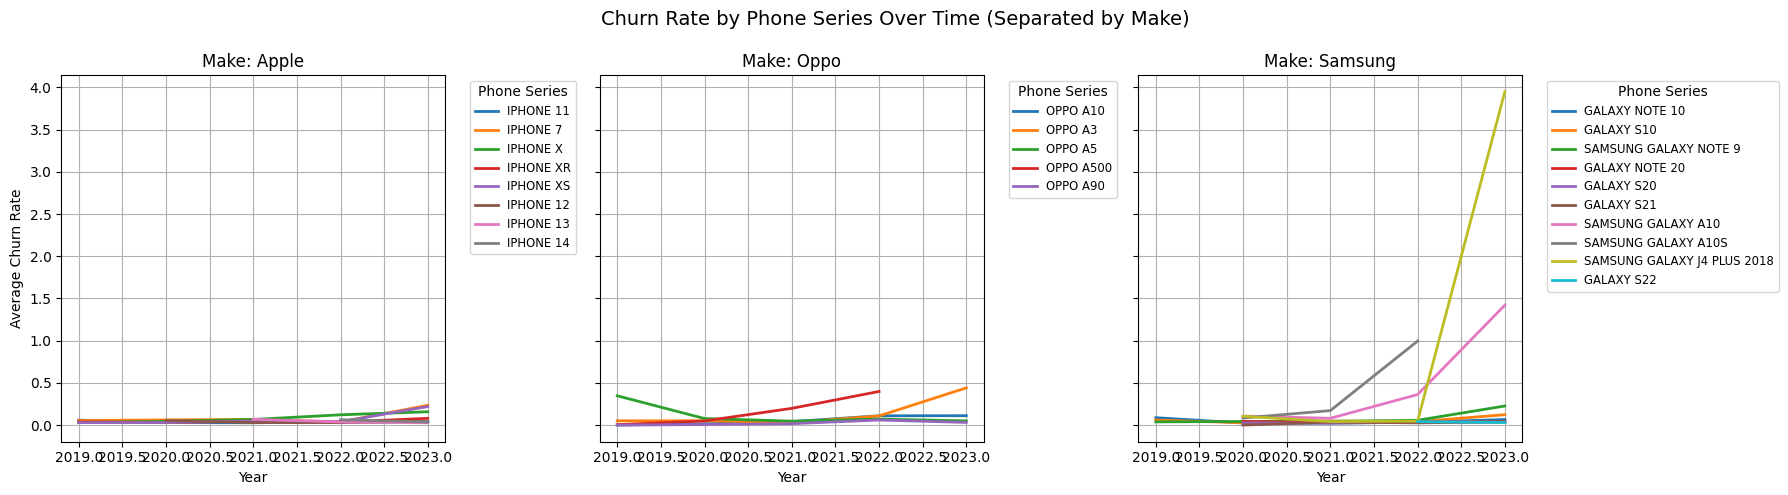

In [22]:
# Group data by 'year', 'make', and 'phone_series', and calculate the average churn rate
churn_by_make_series_year = df.groupby(['make', 'year', 'phone_series'])['churn_rate'].mean().reset_index()

# Get the unique makes in the dataset
unique_makes = churn_by_make_series_year['make'].unique()

# Initialize subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)
fig.suptitle('Churn Rate by Phone Series Over Time (Separated by Make)', fontsize=14)

# Plot for each make
for i, make in enumerate(unique_makes):
    ax = axes[i]  # Select subplot
    make_data = churn_by_make_series_year[churn_by_make_series_year['make'] == make]
    
    # Plot each phone series for the current make
    for series in make_data['phone_series'].unique():
        series_data = make_data[make_data['phone_series'] == series]
        ax.plot(series_data['year'], series_data['churn_rate'], label=series, linewidth=2)
    
    # Add labels and title for the subplot
    ax.set_title(f"Make: {make}")
    ax.set_xlabel('Year')
    if i == 0:  # Add ylabel only for the first plot
        ax.set_ylabel('Average Churn Rate')
    ax.legend(title='Phone Series', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the title position
plt.show()

**Observation:**
The churn rate for the SAMSUNG GALAXY J4 PLUS 2018 increased significantly from 2022 to 2023.

**Possible Explanations:**

- Aging Device:
The SAMSUNG GALAXY J4 PLUS 2018 is an older model launched in 2018. By 2022-2023, the phone may no longer meet performance expectations due to outdated hardware and software, leading to increased customer dissatisfaction and churn.
Older devices often experience performance degradation, battery issues, and lack of software updates, contributing to higher churn.

## Plot 3: Average Churn Rate by Model Age (Months)

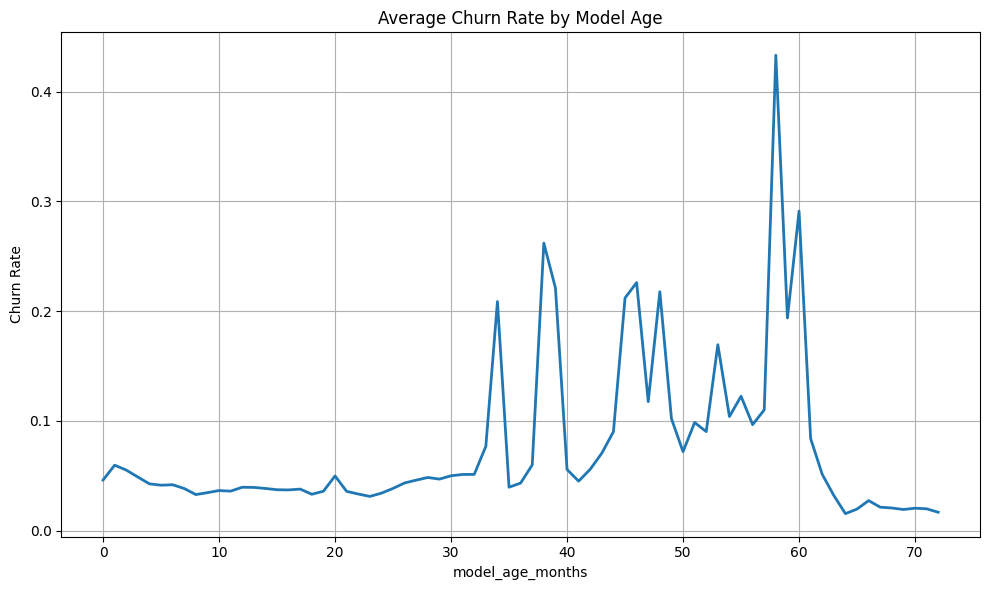

In [23]:
# Group by 'year' and 'make', and calculate the average churn rate
agg_df = df.groupby(['model_age_months'], as_index=False)['churn_rate'].mean()

# Initialize the plot
plt.figure(figsize=(10, 6))

# Group by 'make' and plot each group's average churn rate
plt.plot(agg_df['model_age_months'], agg_df['churn_rate'], linewidth=2)

# Add labels, title, and legend
plt.xlabel('model_age_months')
plt.ylabel('Churn Rate')
plt.title('Average Churn Rate by Model Age')

# Improve aesthetics
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [29]:
agg_df = df.groupby(['model_age_months'], as_index=False)['churn_rate'].mean().sort_values(by='churn_rate', ascending=False)
agg_df

,model_age_months,churn_rate
58,58,0.433113
60,60,0.291094
38,38,0.261952
46,46,0.226019
39,39,0.221095
...,...,...
71,71,0.019898
65,65,0.019683
69,69,0.019271
72,72,0.016770


## Churn Rate Analysis Report

1. **Churn Rate by Phone Make Over Time**
- The churn rate saw an increase in the churn rate of all 3 phone brands increases over time. 

2. **Churn Rate by Phone Series Over Time**  
- The **SAMSUNG GALAXY J4 PLUS 2018** series has the highest churn rate, averaging **0.592** from 2019-2023, suggesting customers are discontinuing the models at a higher rate compared to other series.
- On the other hand, the **GALAXY S20** series shows a relatively low churn rate of **0.03**, indicating better retention for this model.

3. **Churn Rate by Model Age**  
- Models aged between 32 to 63 months shows a higher churn rate compared to newer models, although this rate fluctuates. The highest churn rate occurs 58 months after a phone's launch, which is equivalent to 4.8 years.
